In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [11]:
sns.set_theme(style="whitegrid") # Makes plots look nice
charts_dir = "charts"
if not os.path.exists(charts_dir):
    os.makedirs(charts_dir)

df = pd.read_csv('user_data.csv')
df.head() # Show the first 5 rows

,first_name,last_name,age,gender,total_income,utilities,entertainment,school_fees,shopping,healthcare
0,Aniekan,Winner1,32,Male,21000.0,12000.0,500.0,1000.0,4000.0,1000.0
1,Aniekan,Winner,32,Male,12000.0,1000.0,200.0,800.0,300.0,1200.0
2,Aniekan,Winner,34,Male,13000.0,12000.0,NaN,3200.0,NaN,1200.0
3,Kamara,Joy,26,Female,20000.0,600.0,2000.0,1000.0,8000.0,200.0
4,Joy,Gabriel,27,Female,30000.0,1000.0,NaN,400.0,NaN,700.0


In [12]:
expense_cols = ['utilities', 'entertainment', 'school_fees', 'shopping', 'healthcare']
df[expense_cols] = df[expense_cols].fillna(0)
df.head()

,first_name,last_name,age,gender,total_income,utilities,entertainment,school_fees,shopping,healthcare
0,Aniekan,Winner1,32,Male,21000.0,12000.0,500.0,1000.0,4000.0,1000.0
1,Aniekan,Winner,32,Male,12000.0,1000.0,200.0,800.0,300.0,1200.0
2,Aniekan,Winner,34,Male,13000.0,12000.0,0.0,3200.0,0.0,1200.0
3,Kamara,Joy,26,Female,20000.0,600.0,2000.0,1000.0,8000.0,200.0
4,Joy,Gabriel,27,Female,30000.0,1000.0,0.0,400.0,0.0,700.0



Chart saved to charts\income_by_age.png


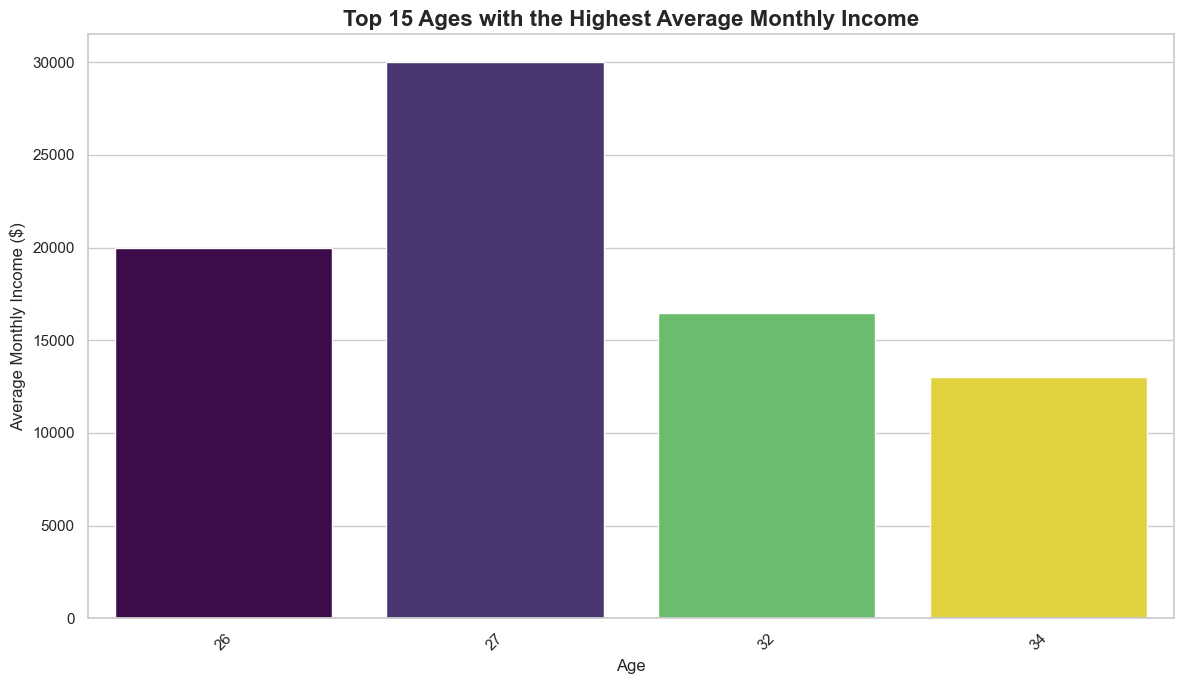

In [14]:
if not df.empty:
    # Group by age and calculate the average income
    income_by_age = df.groupby('age')['total_income'].mean().sort_values(ascending=False).head(15)

    plt.figure(figsize=(12, 7))
    # Assign 'x' to 'hue' to specify what to color by, and disable the legend.
    sns.barplot(x=income_by_age.index, y=income_by_age.values, hue=income_by_age.index, palette="viridis", legend=False)
    plt.title('Top 15 Ages with the Highest Average Monthly Income', fontsize=16, weight='bold')
    plt.xlabel('Age', fontsize=12)
    plt.ylabel('Average Monthly Income ($)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Export the chart
    chart_path = os.path.join(charts_dir, 'income_by_age.png')
    plt.savefig(chart_path)
    print(f"\nChart saved to {chart_path}")
    
    plt.show()

Chart saved to charts\spending_by_gender.png


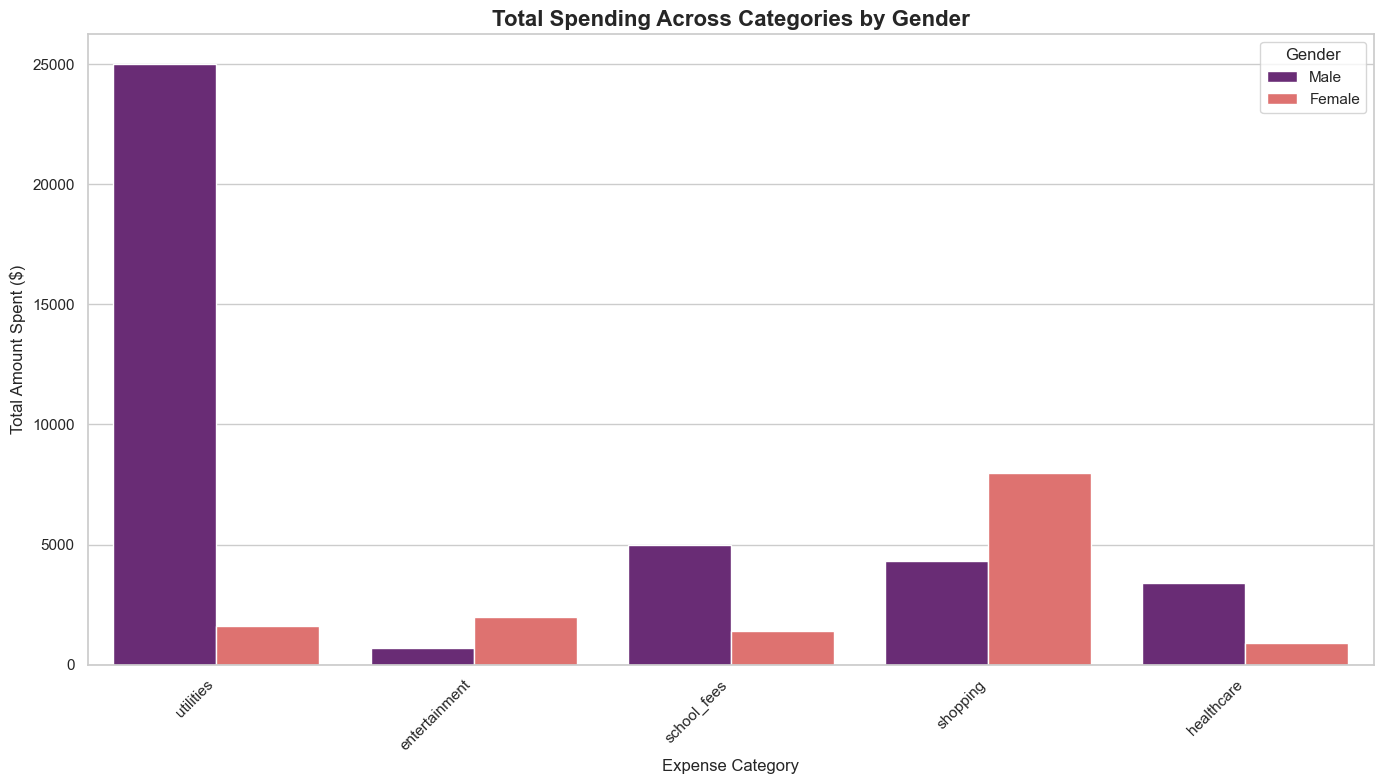

In [16]:
if not df.empty:
    # Melt the dataframe to have a long format for easier plotting
    df_melted = df.melt(
        id_vars=['gender'],
        value_vars=expense_cols,
        var_name='expense_category',
        value_name='amount'
    )

    plt.figure(figsize=(14, 8))
    # *** FIXED CODE HERE ***
    # Replaced deprecated `ci=None` with `errorbar=None`.
    sns.barplot(data=df_melted, x='expense_category', y='amount', hue='gender', palette="magma", estimator=sum, errorbar=None)
    
    plt.title('Total Spending Across Categories by Gender', fontsize=16, weight='bold')
    plt.xlabel('Expense Category', fontsize=12)
    plt.ylabel('Total Amount Spent ($)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Gender')
    plt.tight_layout()

    # Export the chart
    chart_path = os.path.join(charts_dir, 'spending_by_gender.png')
    plt.savefig(chart_path)
    print(f"Chart saved to {chart_path}")
    
    plt.show()